In [57]:
import pandas as pd
from typing import List
from pathlib import Path

import matplotlib.pyplot as plt

In [119]:
def read_prompts(target_experiment: str, tasks: List[str]):
    results = pd.DataFrame()
    for logging_dir in Path(f"../logs/{target_experiment}").rglob("*.csv"):
        if "best_scores" in str(logging_dir):#or not any(task in str(logging_dir) for task in tasks)
            continue

        result = pd.read_csv(logging_dir)

        logging_dir = str(logging_dir)

        logging_dir = logging_dir.replace(f"..\\logs\\{target_experiment}\\", "")
        logging_dir = logging_dir.replace(".csv", "")

        task_name, optimizer, meta_llm, evaluation_llm, random_seed = logging_dir.split("_")

        task_name = task_name.split("/")[-1].split("\\")[-1]

        metainformation = pd.DataFrame(
            {
                "task": [task_name]*len(result),
                "optimizer": [optimizer]*len(result),
                "meta_llm": [meta_llm]*len(result),
                "evaluation_llm": [evaluation_llm]*len(result),
                "random_seed": [random_seed]*len(result),
            }
        )

        result = pd.concat([result, metainformation], axis=1)

        results = pd.concat([result, results], axis=0)

    return results

In [120]:
def get_first_occurences(df):
    occured = []
    dss = []

    for i in range(1, df["step"].max()+1):
        df_new = df.loc[(df["step"]==i)&(~df["prompt"].isin(occured))]
        dss.append(df_new)
        occured += df_new["prompt"].to_list()

    return pd.concat(dss)

def get_plot(df, mean_or_max="mean", task=None, optimizer=None):
    df = get_first_occurences(df).copy()
    df = df[(df["task"]==task)&(df["optimizer"]==optimizer)]

    df_ = df.groupby("step", as_index=False).agg(mean_or_max, numeric_only=True)
    df_["score_std"] = df.groupby("step", as_index=False).std(numeric_only=True)["score"]
    df_.loc[df_["score_std"].isna(), "score_std"] = 0
    df = df_.copy()
    plt.figure(figsize=(10, 6))
    plt.plot(df["step"], df["score"], marker='o')

    plt.plot(df["step"], df["score"] + df["score_std"], 'r--', label='+1 Std Dev')
    plt.plot(df["step"], df["score"] - df["score_std"], 'r--', label='-1 Std Dev')

    # Fill the area between std dev lines
    plt.fill_between(df["step"], df["score"] + df["score_std"], df["score"] - df["score_std"], alpha=0.2, color='red')

    # Customize the plot
    plt.title(f'Score Progression, Task {task}, optimizer {optimizer}')
    plt.xlabel('Step')
    plt.ylabel('Score')
    plt.grid(True)

    plt.xticks(df["step"])

    plt.ylim(0, 1)
    plt.tight_layout()
f    plt.show()


In [143]:
df = read_prompts(r"../logs\experiment-task-descr", [":)"])
df["use_task_desc"] = True
df2 = read_prompts(r"../logs\experiment", [":)"])
df2["use_task_desc"] = False


df = pd.concat([df, df2])


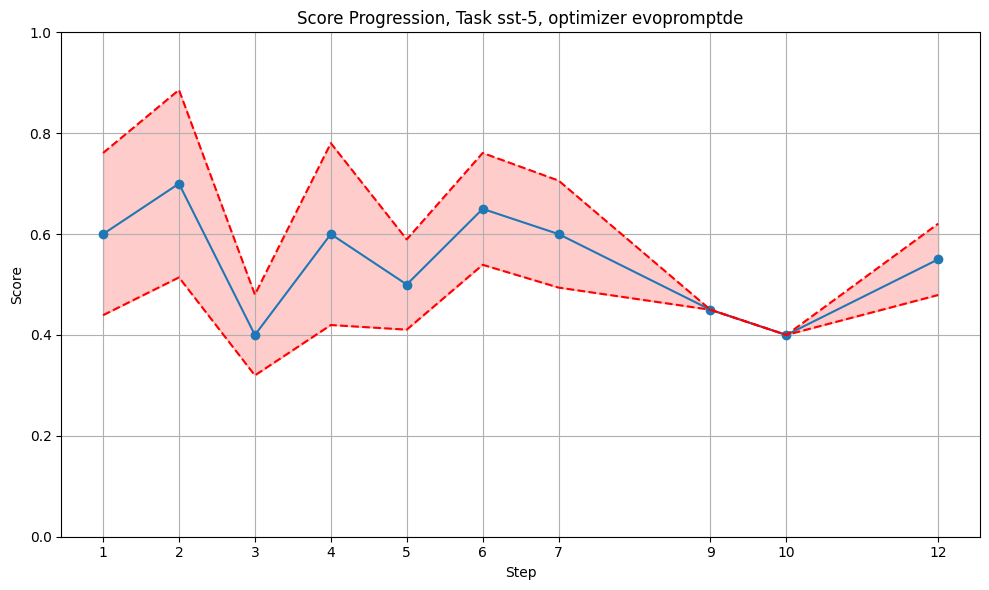

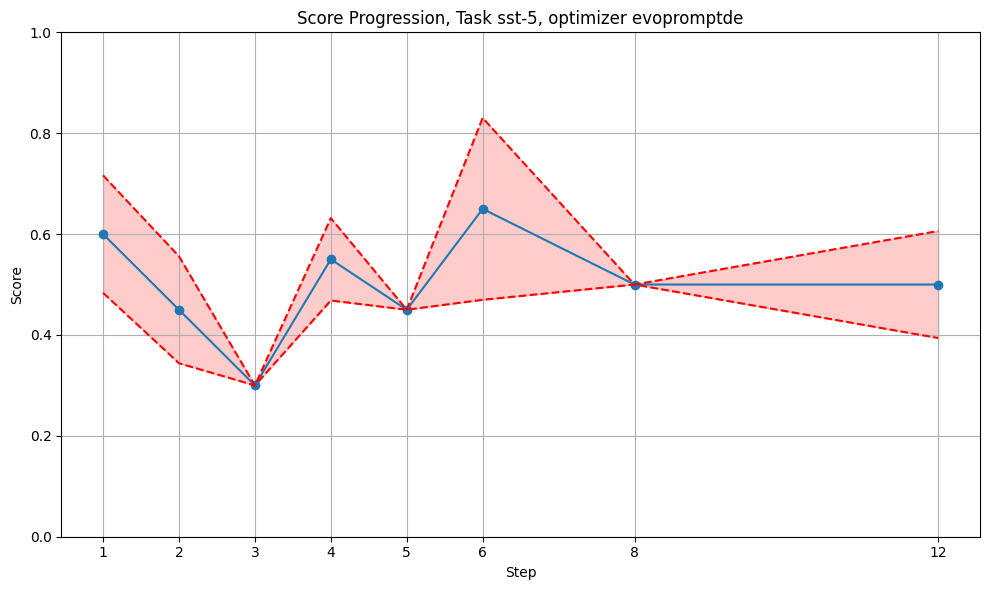

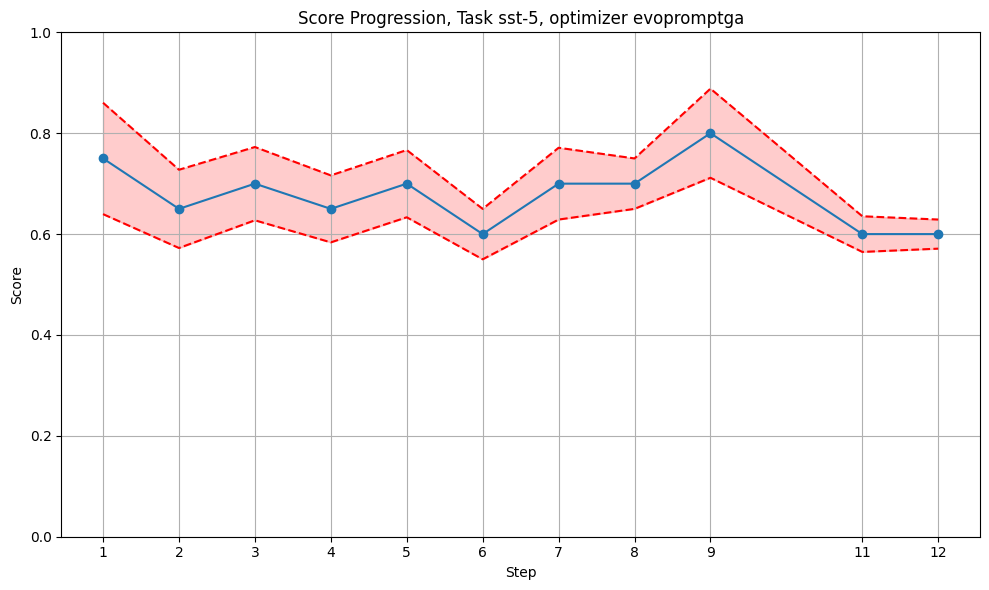

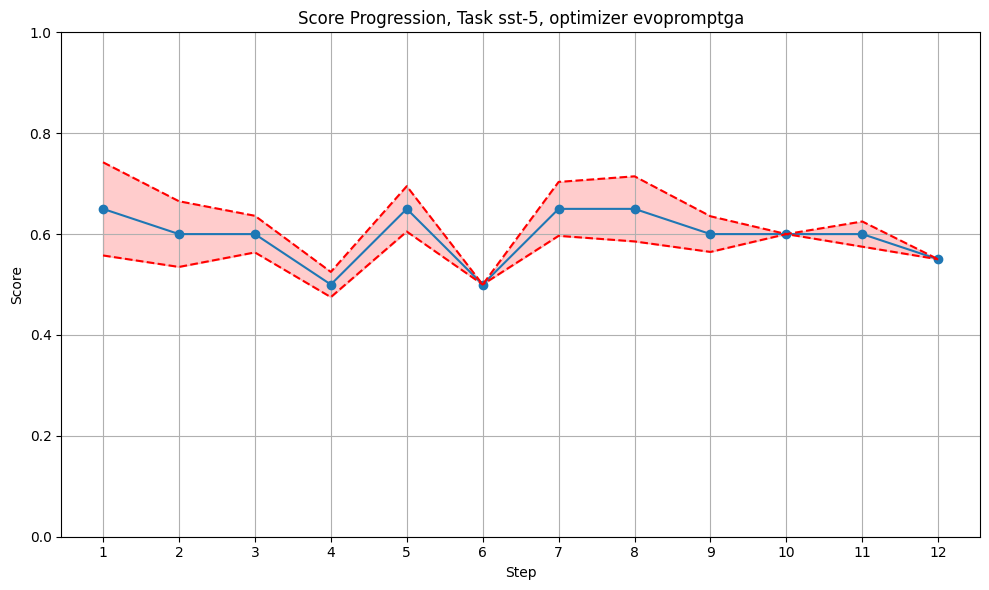

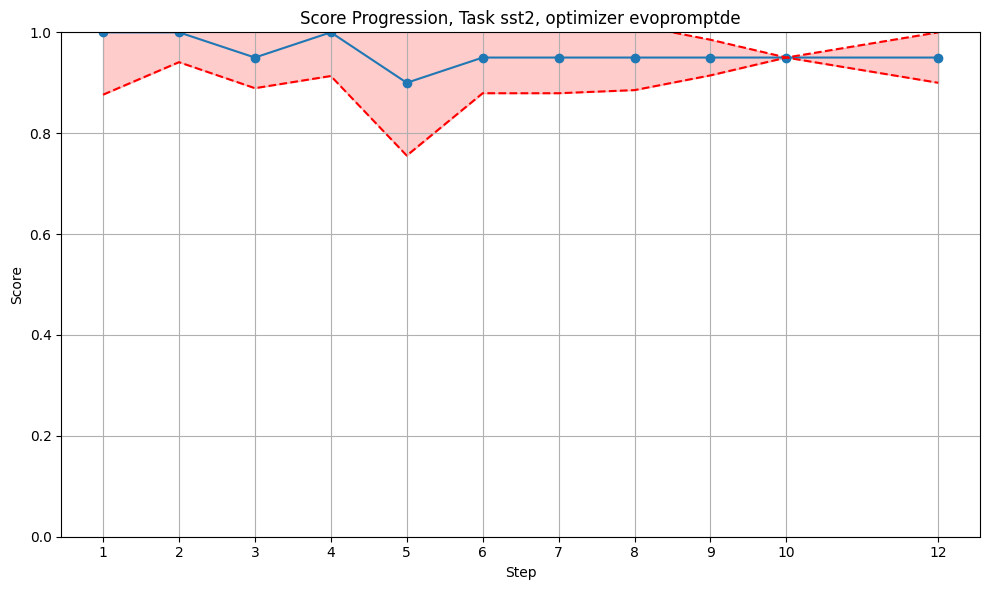

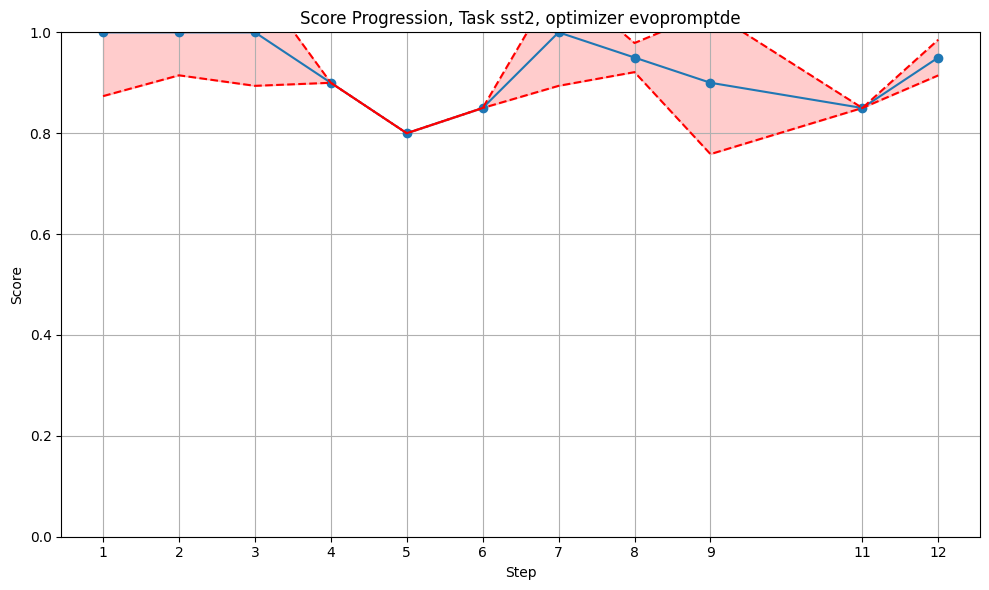

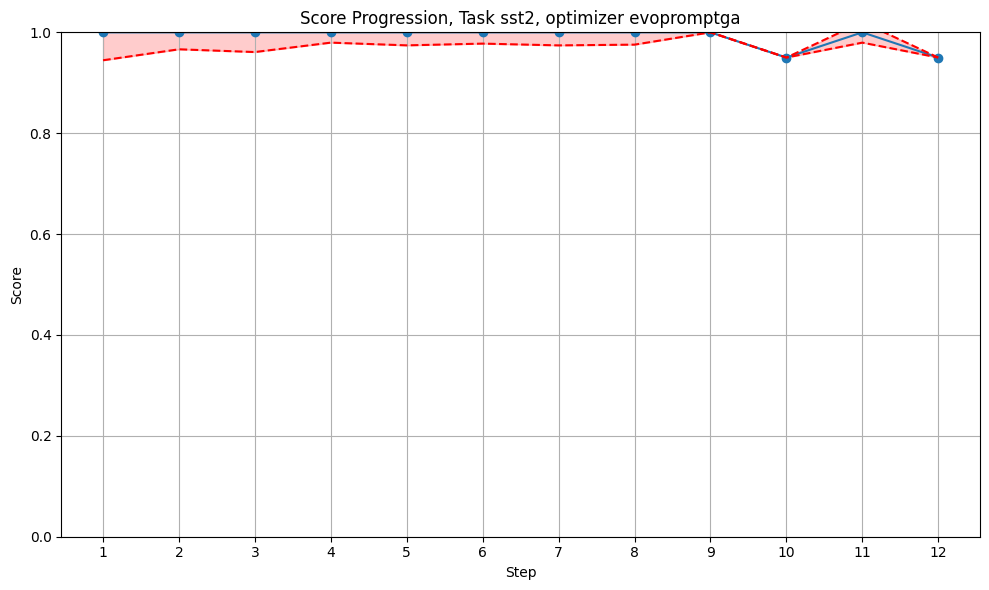

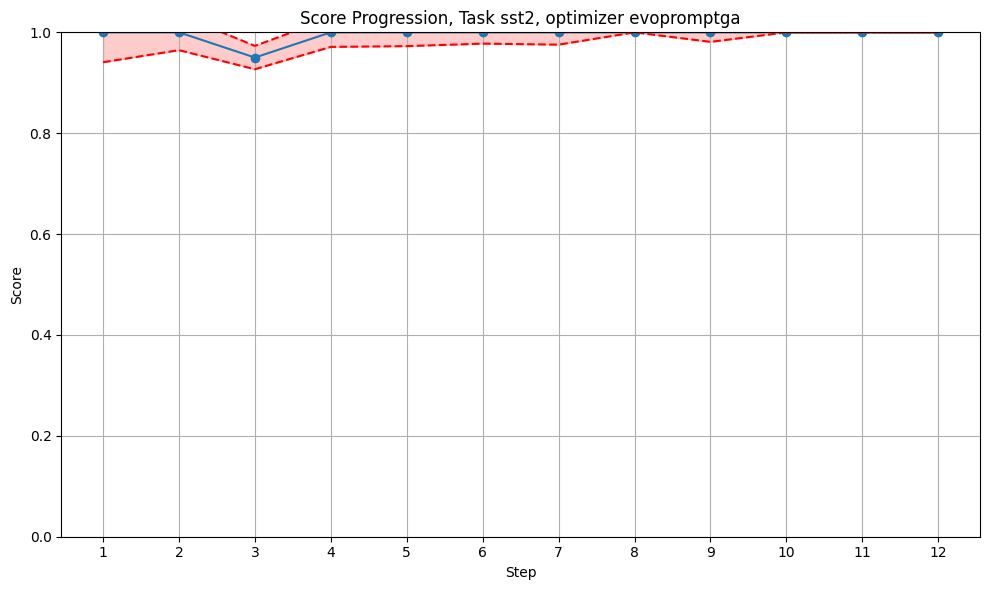

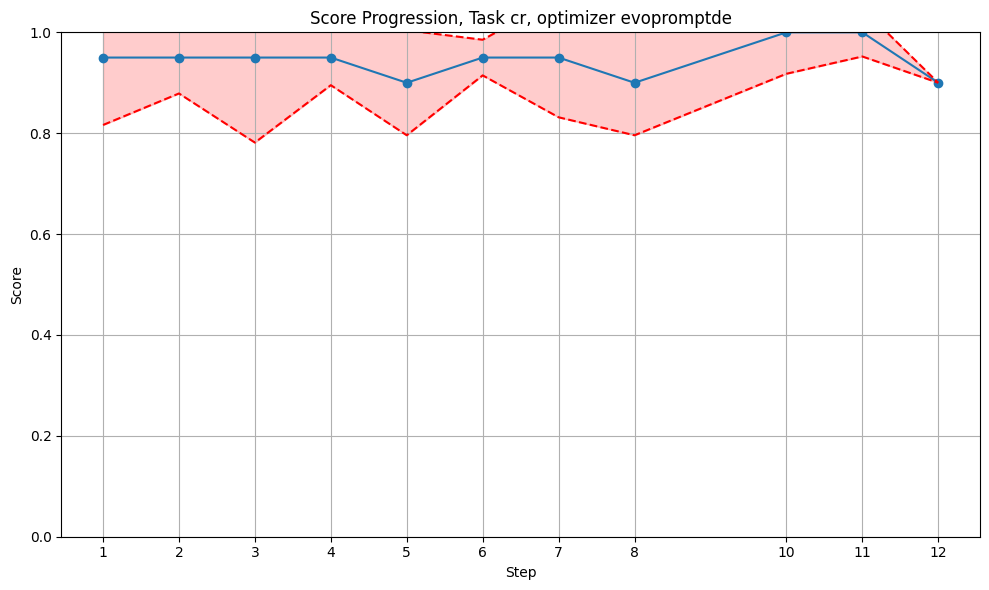

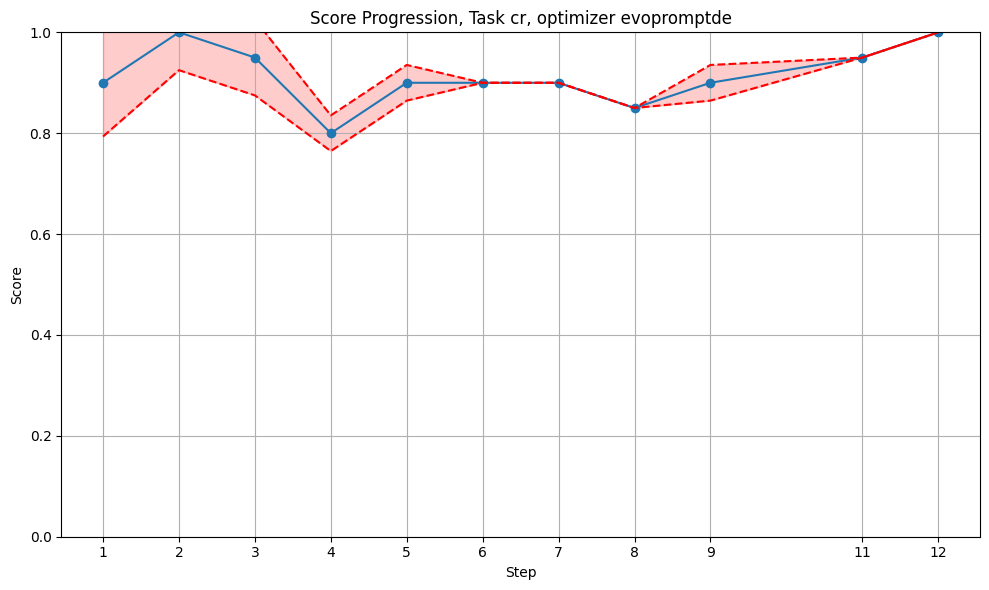

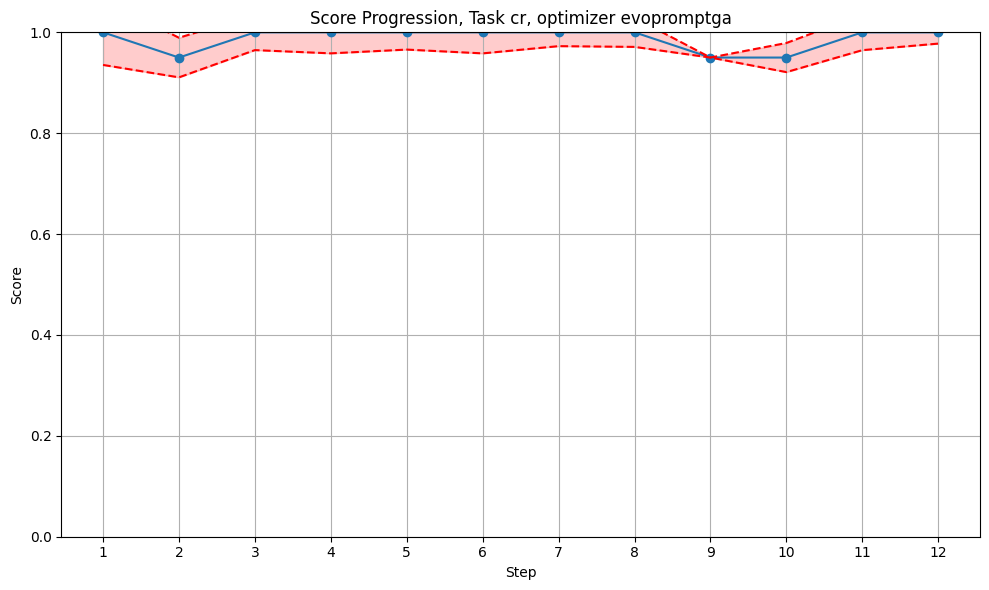

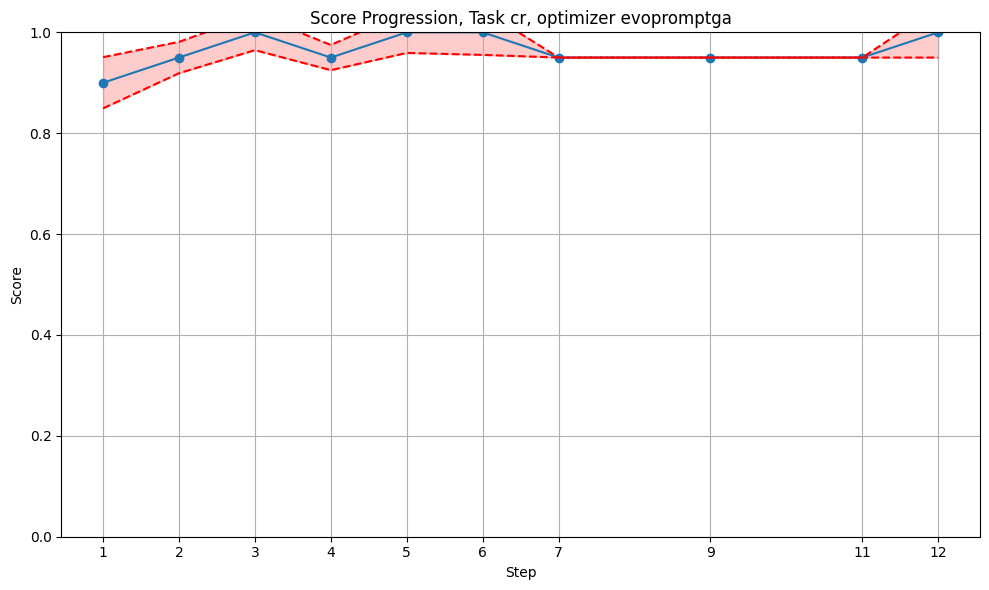

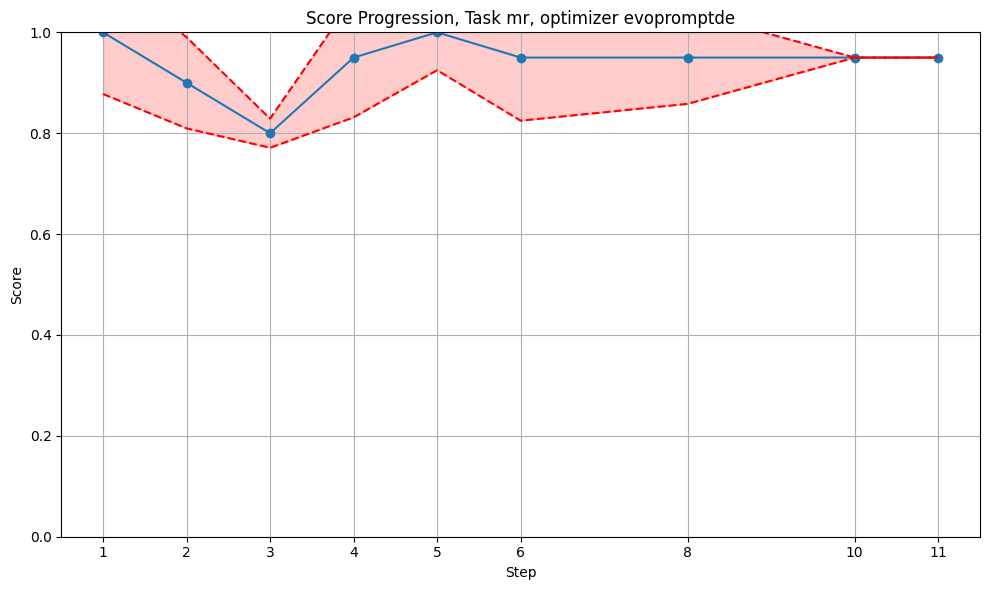

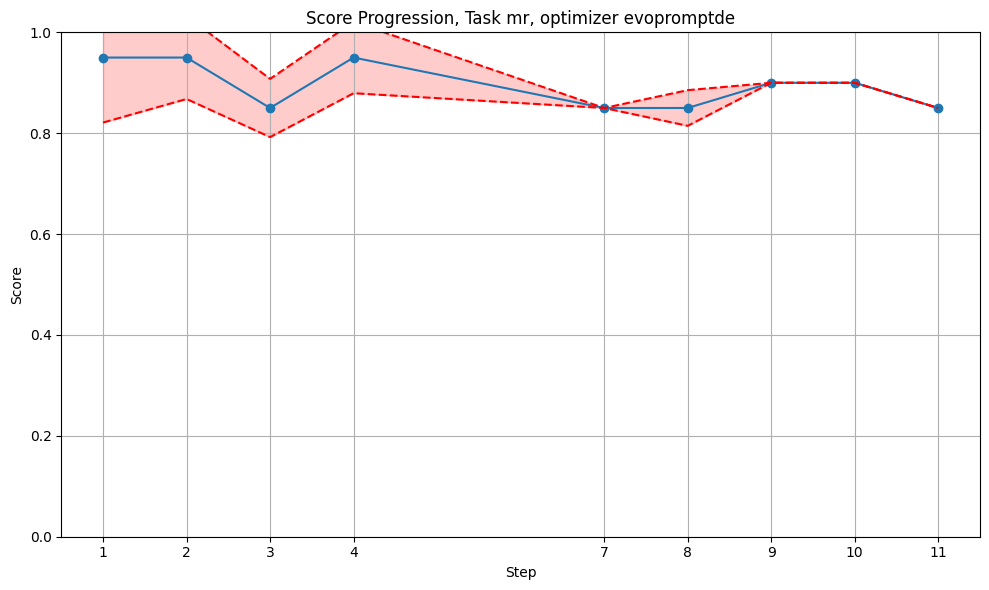

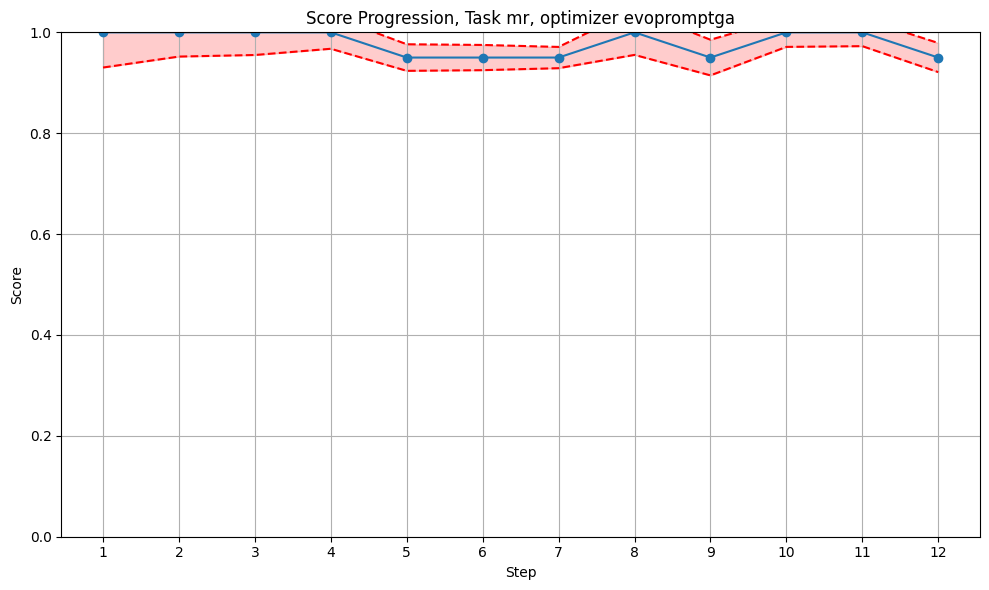

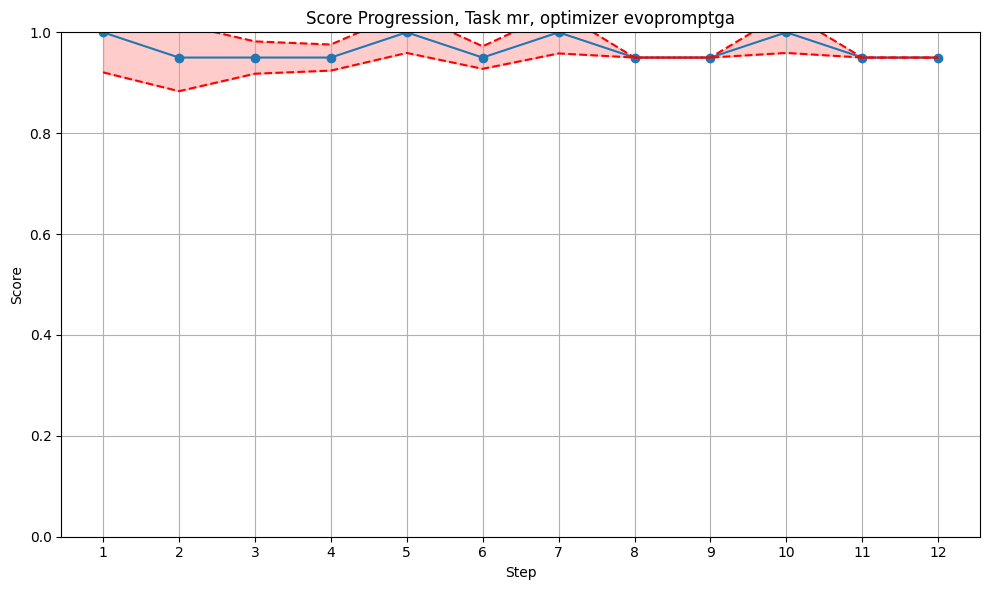

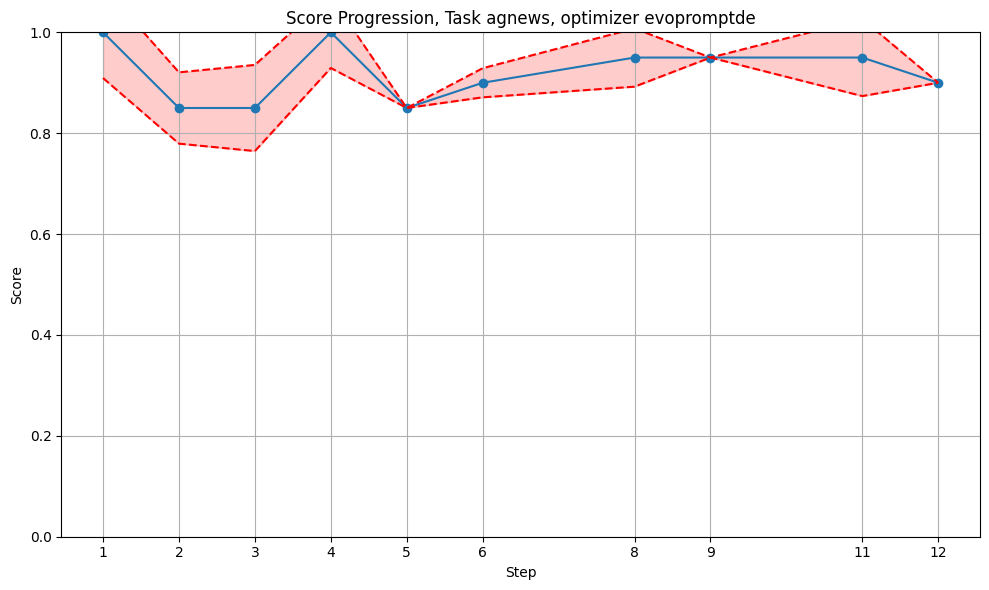

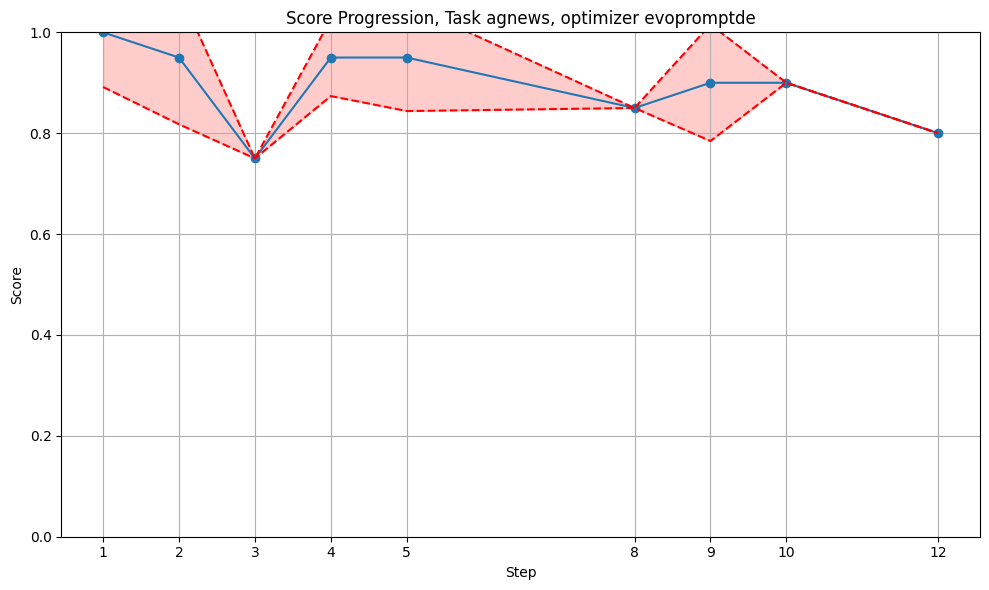

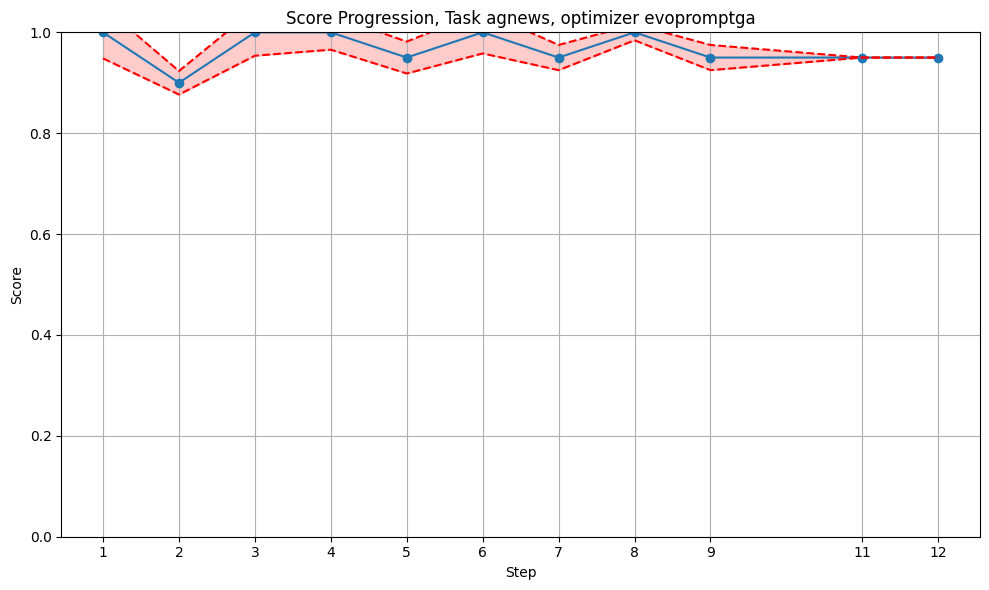

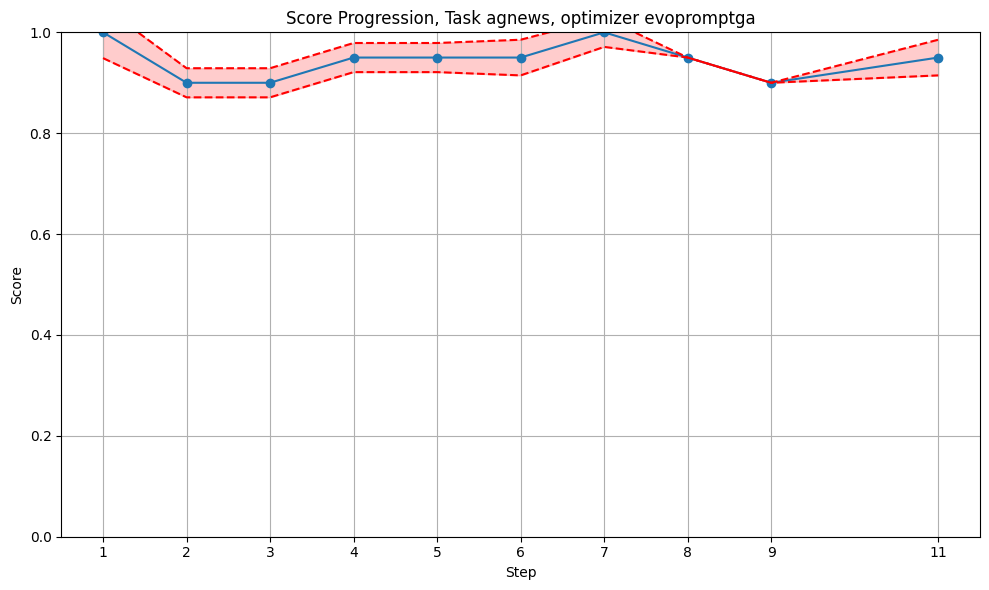

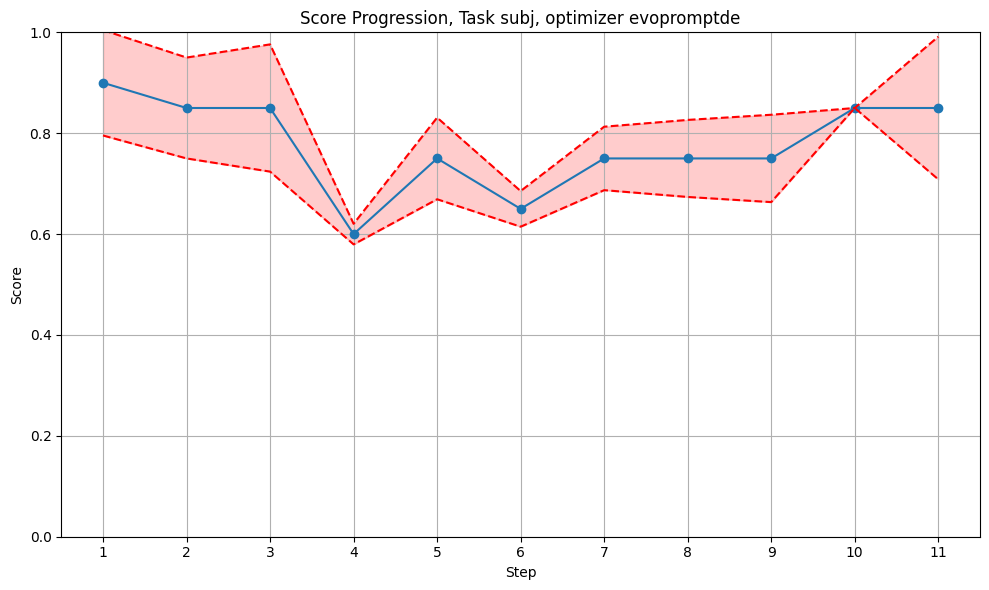

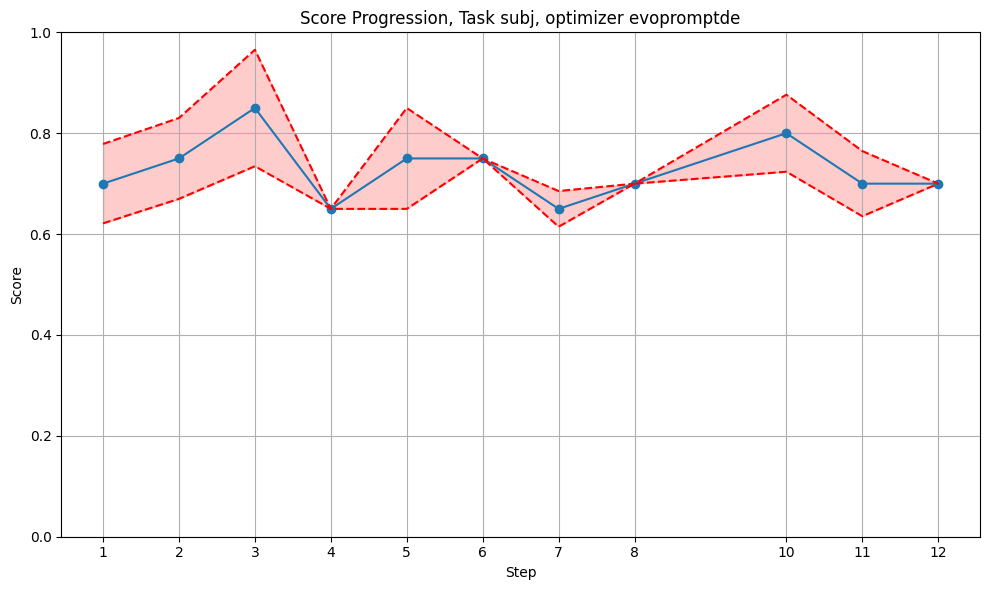

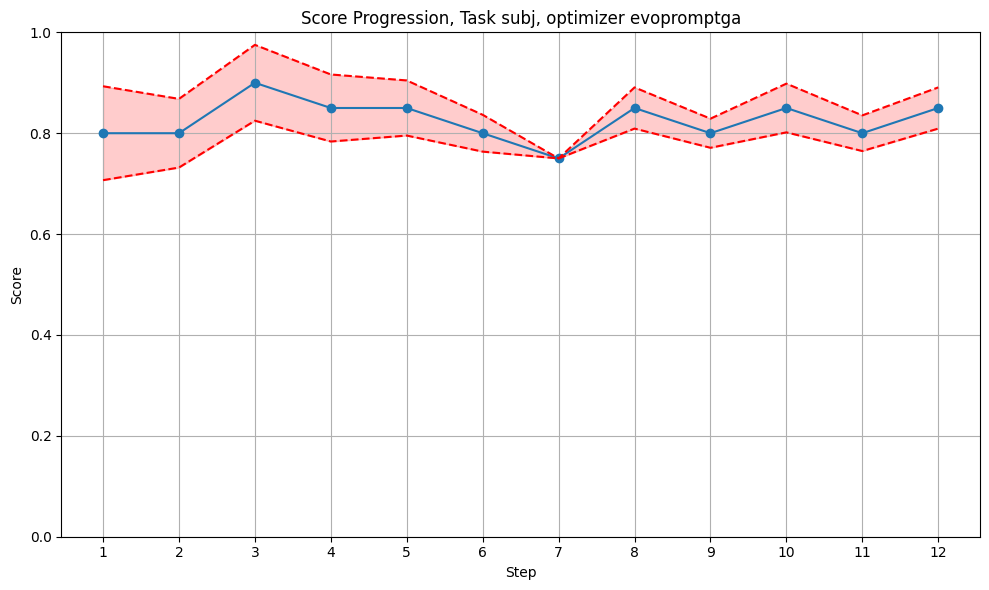

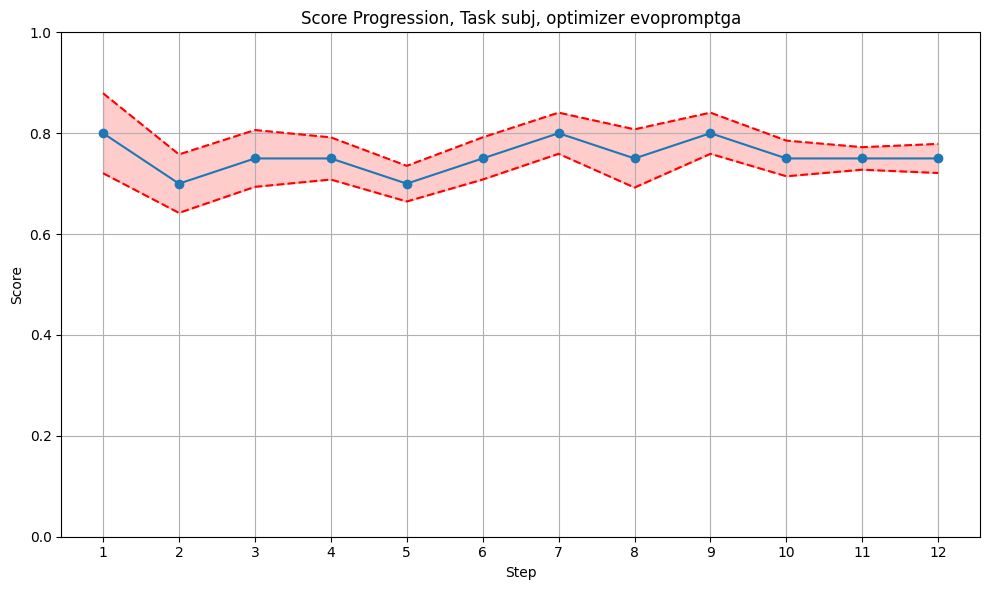

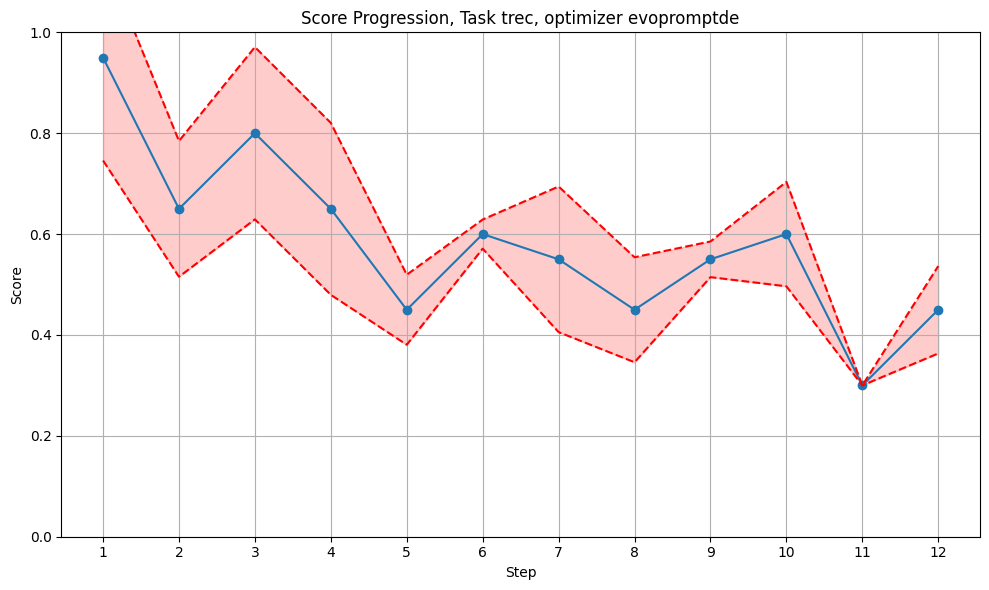

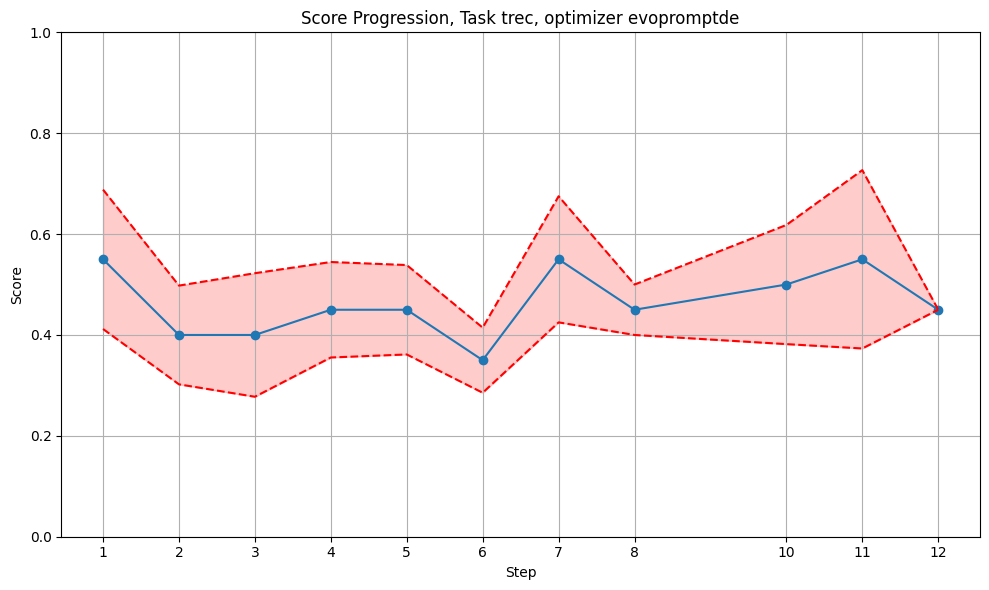

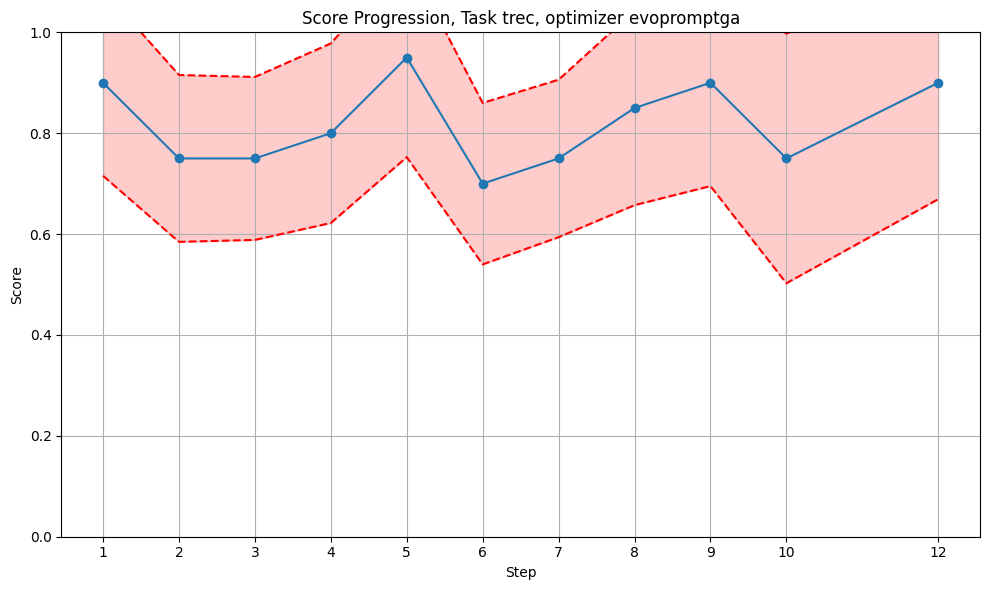

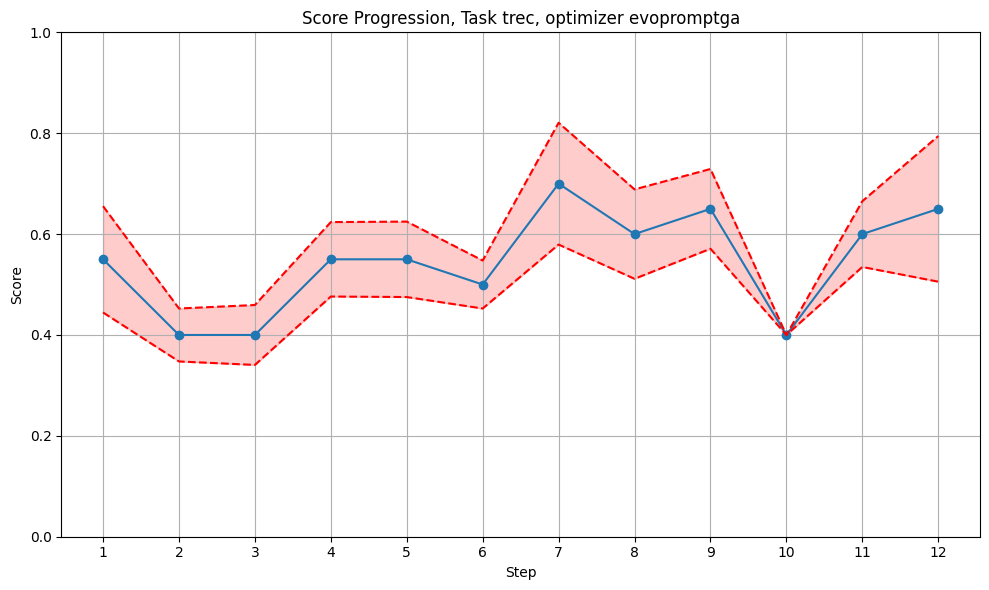

In [147]:
for task in ["sst-5", "sst2", "cr", "mr", "agnews", "subj", "trec"]:
    for optimizer in ["evopromptde", "evopromptga"]:
        get_plot(df[~df["use_task_desc"]], "max", task=task, optimizer=optimizer)
        get_plot(df[df["use_task_desc"]], "max", task=task, optimizer=optimizer)


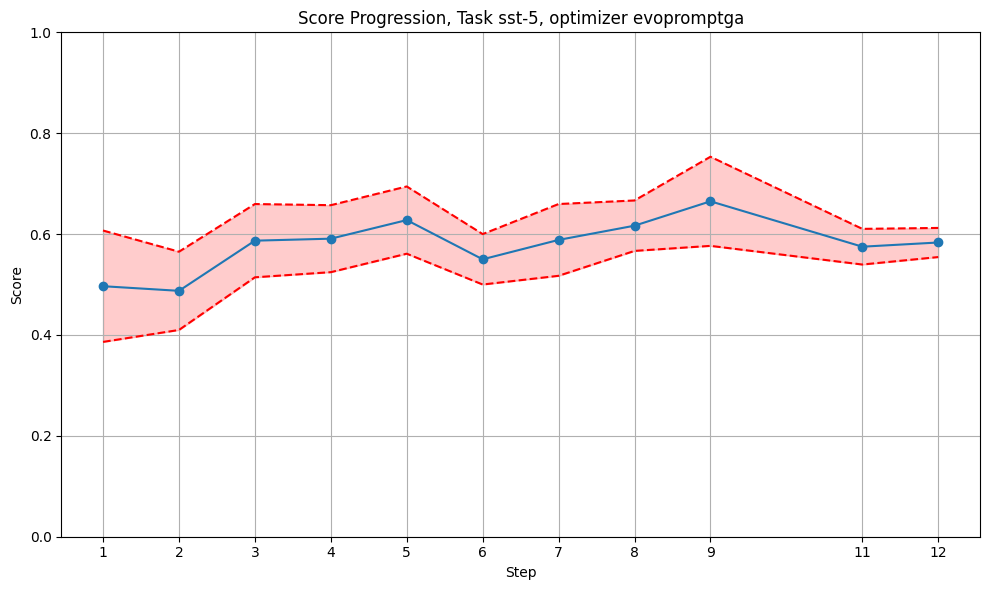

In [137]:
get_plot(df[~df["use_task_desc"]], task="sst-5", optimizer="evopromptga")


In [101]:
df_td.groupby("step", as_index=False).std()["score"]

C:\Users\tzehl\AppData\Local\Temp\ipykernel_9132\1391080366.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_td.groupby("step", as_index=False).std()["score"]


0     0.243957
1     0.235310
2     0.233010
3     0.226352
4     0.222414
5     0.219602
6     0.215095
7     0.212186
8     0.212217
9     0.208529
10    0.205834
11    0.203871
Name: score, dtype: float64

In [39]:
get_first_occurences(df_td)

,step,prompt,score,task,optimizer,meta_llm,evaluation_llm,random_seed
0,1,"Your task is to choose a type of the question,...",0.45,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69
1,1,Please pick the category that matches this sen...,0.35,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69
2,1,Please perform Question Classification task. G...,0.30,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69
3,1,Analyze an English question and identify which...,0.30,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69
4,1,Classify this sentence into one of the six que...,0.25,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69
5,1,"Classify this question: Description, Entity, E...",0.25,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69
6,1,Classify this question into one of the followi...,0.25,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69
7,1,Categorize the question into one of the follow...,0.25,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69
8,1,Identify the category that corresponds to this...,0.20,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69
9,1,Classify the given question by assigning a sin...,0.20,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69


In [19]:
df_hm.groupby("step").mean()

C:\Users\tzehl\AppData\Local\Temp\ipykernel_9132\1597024715.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hm.groupby("step").mean()


,score
step,
1,0.45
4,0.55
6,0.55
7,0.70
8,0.70


In [10]:
df_td[(df_td["task"]==r"descr\cr")&(df_td["optimizer"]=="evopromptde")&(df_td["random_seed"]=="42")]

,step,prompt,score,task,optimizer,meta_llm,evaluation_llm,random_seed


In [11]:
df_td = df_td.sort_values("score", ascending=False)
df_td = df_td.groupby(["step", "task", "optimizer", "meta_llm", "evaluation_llm", "random_seed"], as_index=False).first()

df_td[(df_td["task"]==r"descr\cr")&(df_td["optimizer"]=="evopromptde")&(df_td["random_seed"]=="42")]

,step,task,optimizer,meta_llm,evaluation_llm,random_seed,prompt,score


In [12]:
df_td

,step,task,optimizer,meta_llm,evaluation_llm,random_seed,prompt,score
0,1,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,"Your task is to choose a type of the question,...",0.45
1,2,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,"Your task is to choose a type of the question,...",0.45
2,3,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,"Your task is to choose a type of the question,...",0.45
3,4,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,"For a given question, identify its type by mat...",0.55
4,5,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,"For a given question, identify its type by mat...",0.55
5,6,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,Identify the question type by assigning a cate...,0.55
6,7,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,Recognize the primary category of each questio...,0.70
7,8,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,Decipher the question's category by selecting ...,0.70
8,9,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,Decipher the question's category by selecting ...,0.70
9,10,descr\trec,evopromptga,meta-llama\Meta-Llama-3-8B-Instruct,meta-llama\Meta-Llama-3-8B-Instruct,69,Decipher the question's category by selecting ...,0.70
